In [25]:
using Plots

include("modulation.jl")
include("bits.jl")
include("utils.jl")

filterZeros (generic function with 1 method)

In [26]:
# generate a bitstream
numBits = 9600
modOrder = 64
pad = Int(log2(modOrder))
bitstream = generateBitstream(numBits)
symstream = bitstream2symbolstream(bitstream, pad)

# apply Gray encoding
systream = [ encodeGray(sym) for sym in symstream ]

1600-element Array{Int64,1}:
 29
 39
 12
 34
  1
 27
 29
 56
 45
 52
 49
 55
 14
  ⋮
 61
 43
 37
 58
 49
  0
 53
 35
 54
 32
 22
 37

In [27]:
# define some modulators

qam = QAM(modOrder)
psk = PSK(modOrder)

PSK(64, 6, Complex[0.7071067811865476 + 0.7071067811865475im, 0.6343932841636455 + 0.7730104533627369im, 0.5555702330196023 + 0.8314696123025452im, 0.4713967368259978 + 0.8819212643483549im, 0.38268343236508984 + 0.9238795325112867im, 0.29028467725446233 + 0.9569403357322089im, 0.19509032201612833 + 0.9807852804032304im, 0.09801714032956077 + 0.9951847266721968im, 6.123233995736766e-17 + 1.0im, -0.09801714032956065 + 0.9951847266721969im  …  0.9807852804032303 - 0.19509032201612872im, 0.9951847266721969 - 0.0980171403295605im, 1.0 - 2.4492935982947064e-16im, 0.9951847266721969 + 0.09801714032956002im, 0.9807852804032304 + 0.19509032201612825im, 0.9569403357322089 + 0.290284677254462im, 0.9238795325112871 + 0.3826834323650891im, 0.881921264348355 + 0.47139673682599753im, 0.8314696123025456 + 0.5555702330196018im, 0.7730104533627369 + 0.6343932841636455im], 1.0, 0.16666666666666666)

In [28]:
# modulate date
xqam = modulate(qam, symstream)
xpsk = modulate(psk, symstream)

1600-element Array{Complex{Float64},1}:
   -0.9807852804032304 + 0.1950903220161286im
    0.9807852804032304 + 0.19509032201612825im
 6.123233995736766e-17 + 1.0im
    0.9238795325112871 + 0.3826834323650891im
    0.6343932841636455 + 0.7730104533627369im
   -0.8314696123025453 + 0.5555702330196022im
   -0.9807852804032304 + 0.1950903220161286im
    0.6343932841636456 - 0.7730104533627369im
    0.9807852804032303 - 0.19509032201612872im
  -0.09801714032956045 - 0.9951847266721969im
   -0.6343932841636452 - 0.7730104533627372im
  -0.29028467725446244 - 0.9569403357322088im
  -0.29028467725446216 + 0.9569403357322089im
                       ⋮
   0.09801714032956009 - 0.9951847266721969im
    0.8314696123025452 - 0.5555702330196022im
    0.9951847266721969 + 0.09801714032956002im
   0.38268343236508917 - 0.923879532511287im
   -0.6343932841636452 - 0.7730104533627372im
    0.7071067811865476 + 0.7071067811865475im
  -0.19509032201612866 - 0.9807852804032303im
     0.881921264348355 + 0.4

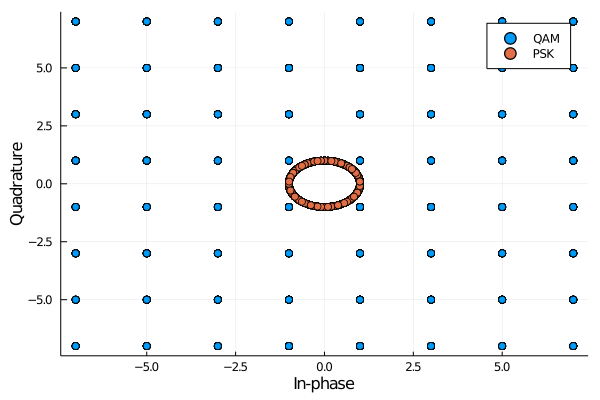

In [29]:
pl = scatter(real(xqam), imag(xqam), label = "QAM")
scatter!(pl, real(xpsk), imag(xpsk), label = "PSK")
xlabel!("In-phase")
ylabel!("Quadrature")